<a href="https://colab.research.google.com/github/Ester-Taniya/DI-Bootcamp/blob/main/Week6/Day5/Daily_ChallengeW6_D5d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
file_path = 'train.csv'
df = pd.read_csv(file_path)

# Cheack data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [38]:
# show dataset
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [39]:
# Check for null values
print("Null values in the data:")
print(df.isnull().sum())

Null values in the data:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [61]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [41]:
# mode:
df.mode()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,618.0,0.0,0.5,1.0,0.0,1.0,27.0,0.1,182.0,4.0,...,347.0,874.0,1229,17.0,1.0,7.0,1.0,1.0,1.0,0.0
1,1589.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1247.0,1464,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1872.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2227,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2610,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3142,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Range
df.max() - df.min()


battery_power    1497.0
blue                1.0
clock_speed         2.5
dual_sim            1.0
fc                 19.0
four_g              1.0
int_memory         62.0
m_dep               0.9
mobile_wt         120.0
n_cores             7.0
pc                 20.0
px_height        1960.0
px_width         1498.0
ram              3742.0
sc_h               14.0
sc_w               18.0
talk_time          18.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         3.0
dtype: float64

In [52]:
# Skewness
print("Skewness:")
print(df['price_range'].skew())

# Kurtosis
print("Kurtosis:")
print(df['price_range'].kurtosis())



Skewness:
0.0
Kurtosis:
-1.360400119699068


- The skewness of 0.0 suggests a symmetric distribution, where the values are equally distributed on both sides of the mean.
- The negative kurtosis suggests that the distribution has lighter tails and a flatter peak compared to a normal distribution.


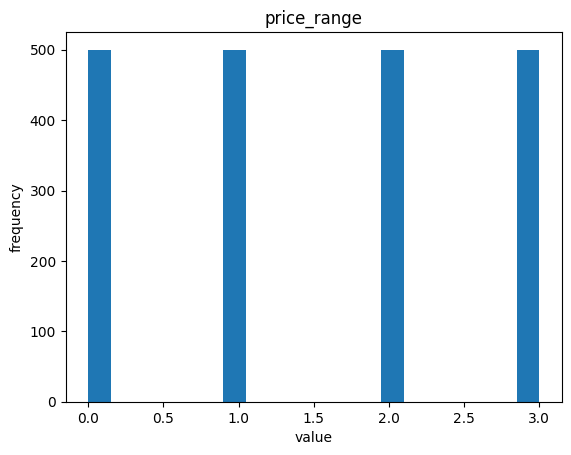

In [68]:

df['price_range'].plot(kind='hist', bins=20, title='price_range')

plt.xlabel('value')
plt.ylabel('frequency')

plt.show()




Skewness:
0.03189847179278164
Kurtosis:
-1.2241438831965528


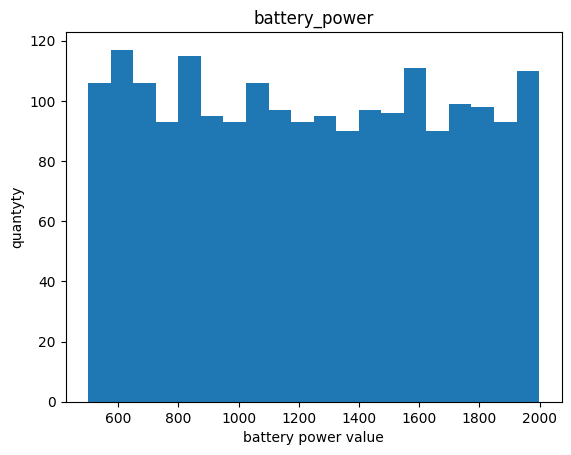

In [71]:
# Skewness
print("Skewness:")
print(df['battery_power'].skew())

# Kurtosis
print("Kurtosis:")
print(df['battery_power'].kurtosis())


df['battery_power'].plot(kind='hist', bins=20, title='battery_power')
plt.xlabel('battery power value')
plt.ylabel('quantyty')
plt.show()


In summary:

-The positive skewness suggests a slight rightward skew, indicating a longer right tail.
-The negative kurtosis indicates a platykurtic distribution with a flatter peak and lighter tails than a normal distribution.


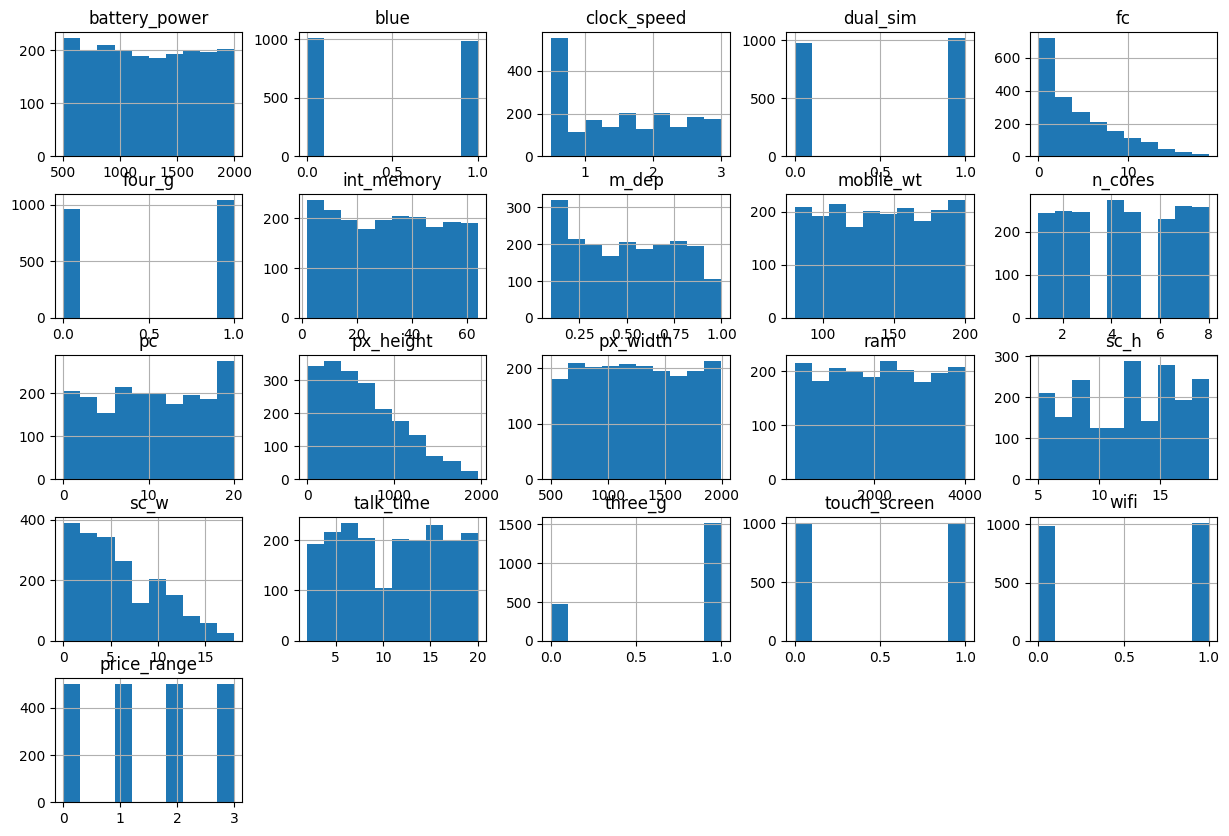

In [73]:
# distribution to each paramiters
df.hist(figsize=(15, 10))
plt.show()



In [79]:
# prompt: Apply advanced SciPy statistical functions for deeper insights.

# Correlation analysis
correlation_matrix = df.corr()
print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
               battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_wi

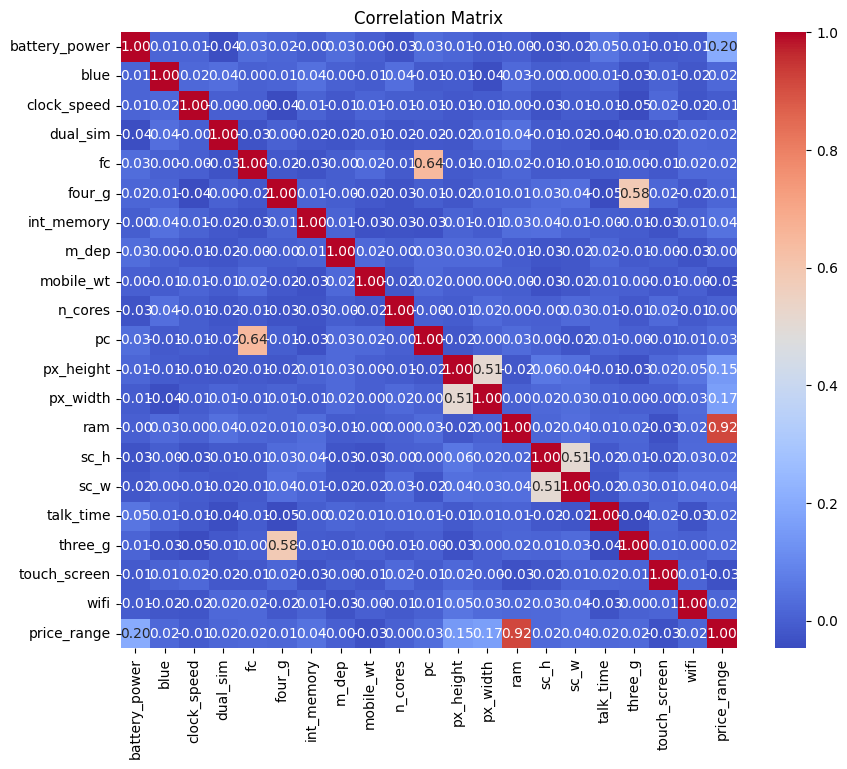

In [82]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()


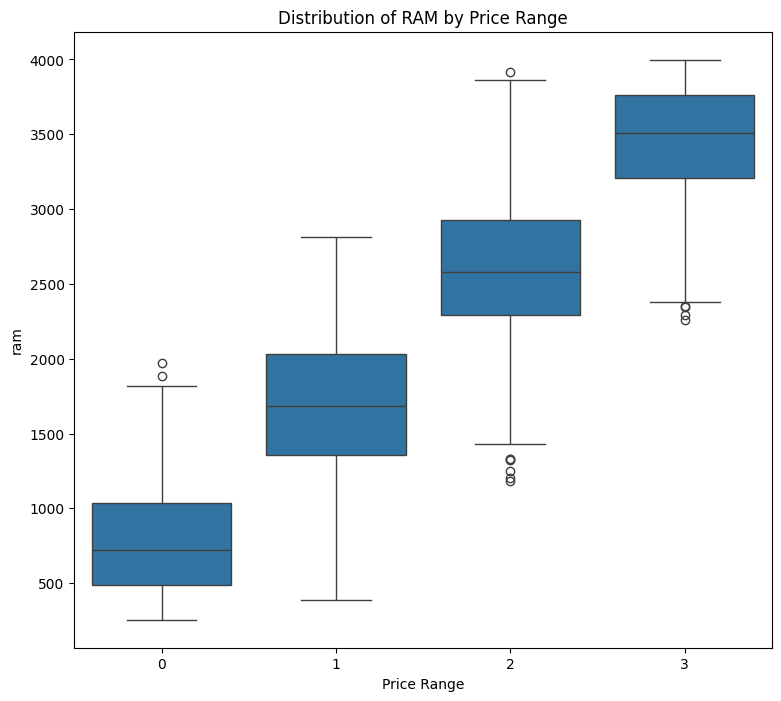

In [104]:
# box ploat
plt.figure(figsize=(9,8))
sns.boxplot(x='price_range', y='ram', data=df)
plt.xlabel('Price Range')
plt.ylabel('ram')
plt.title('Distribution of RAM by Price Range')
plt.show()


 representation of the distribution of 'ram' values within each category of 'price_range,'

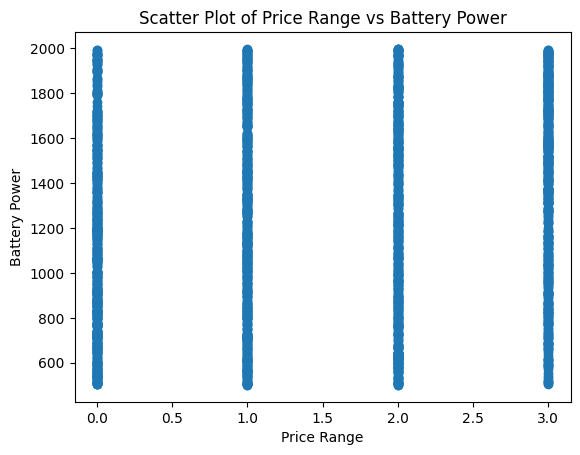

In [103]:
# Scatter plot for relationship between price range and battery power
plt.scatter(df['price_range'], df['battery_power'])
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Scatter Plot of Price Range vs Battery Power')
plt.show()
